### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Flight Price Dataset

In [2]:
train = pd.read_excel(r"C:\Users\zaida\Downloads\1 - Question Paper-20240210T051625Z-001\1 - Question Paper\Dataset\Flight Price Dataset\Flight_Price_Train.xlsx")

In [3]:
test = pd.read_excel(r"C:\Users\zaida\Downloads\1 - Question Paper-20240210T051625Z-001\1 - Question Paper\Dataset\Flight Price Dataset\Flight_Price_Test.xlsx")

In [4]:
print("Shape of the train dataset = ",train.shape)
print("Shape of the test dataset = ",test.shape)

Shape of the train dataset =  (10683, 11)
Shape of the test dataset =  (2671, 10)


In [5]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


### Exploring The Features

In [8]:
train.Date_of_Journey.unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

In [9]:
train.Duration.value_counts()

Duration
2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: count, Length: 368, dtype: int64

In [10]:
train.Total_Stops.value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [11]:
# Here only one  record are available of 4 stops so i converted into 3 stops
train.Total_Stops = train.Total_Stops.replace("4 stops","3 stops")

In [12]:
train.Additional_Info.value_counts()

Additional_Info
No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [13]:
train["Additional_Info"] = train.Additional_Info.replace("No Info","No info")

In [14]:
train.Additional_Info.value_counts()

Additional_Info
No info                         8348
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

## Missing Values

In [15]:
train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [16]:
# There is only one Nan are available in route and one Nan in Total_stops 
# If we want we can delete these nans cause there is only 2 are there

In [17]:
# But Lets fill them 
# Route is a caategorical Variable so we will use mode()
train["Route"] = train.Route.fillna(train.Route.mode()[0])

In [18]:
# Total Stops is also Categorical Variable - Mode()
train["Total_Stops"] = train.Total_Stops.fillna(train.Total_Stops.mode()[0])

In [19]:
train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### Extracting Date, Month, Year from Date of journey Column

In [20]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [21]:
train["Date_of_Journey"] = pd.to_datetime(train["Date_of_Journey"])

In [22]:
train["journey_Year"] = train["Date_of_Journey"].dt.year

In [23]:
train["journey_Month"] = train["Date_of_Journey"].dt.month

In [24]:
train["journey_Day"] = train["Date_of_Journey"].dt.day

In [25]:
train.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_Year,journey_Month,journey_Day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24


In [26]:
# Drop - Date_of_journey
train.drop("Date_of_Journey",axis=1,inplace=True)

In [95]:
train.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,journey_Year,journey_Month,journey_Day,Duration_in_minutes
0,3,0,5,18,22.33,1.17,3,4,3897,2019,3,24,170


# EDA

### Which airline is most preferred airline

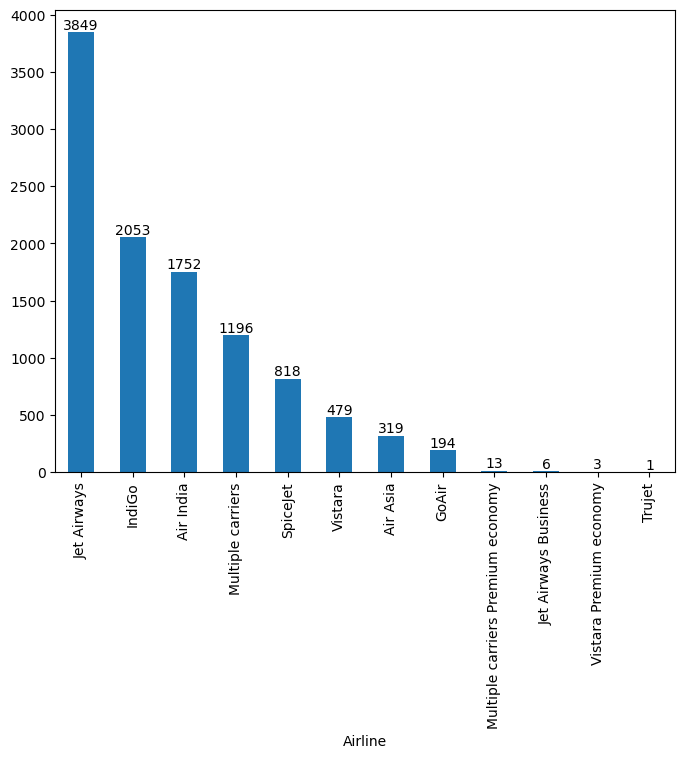

In [28]:
ax = train.Airline.value_counts().plot(kind="bar",figsize=(8,6))
for i in ax.containers:
    ax.bar_label(i)

In [29]:
# As you can see jet Airways is a most preferred airline

### Find the majority of the flights take off from which source

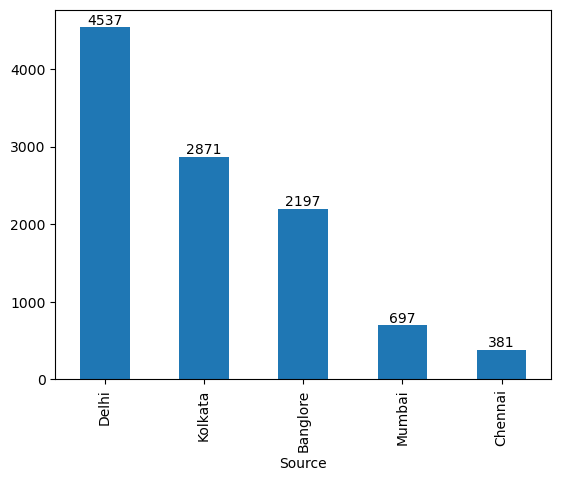

In [30]:
ax = train.Source.value_counts().plot(kind="bar")
for i in ax.containers:
    ax.bar_label(i)

In [31]:
# As you can see majority fllights are take off from Delhi

### Find maximum flights land in which destination

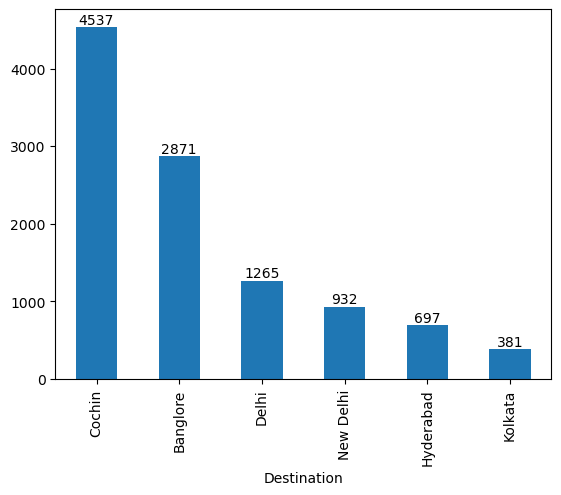

In [32]:
ax = train.Destination.value_counts().plot(kind="bar")
for i in ax.containers:
    ax.bar_label(i)

In [33]:
# Maximum Flights are land in Cochin 

### Compare independent features with Target feature to check the impact on price
a) Which airline has the highest price 


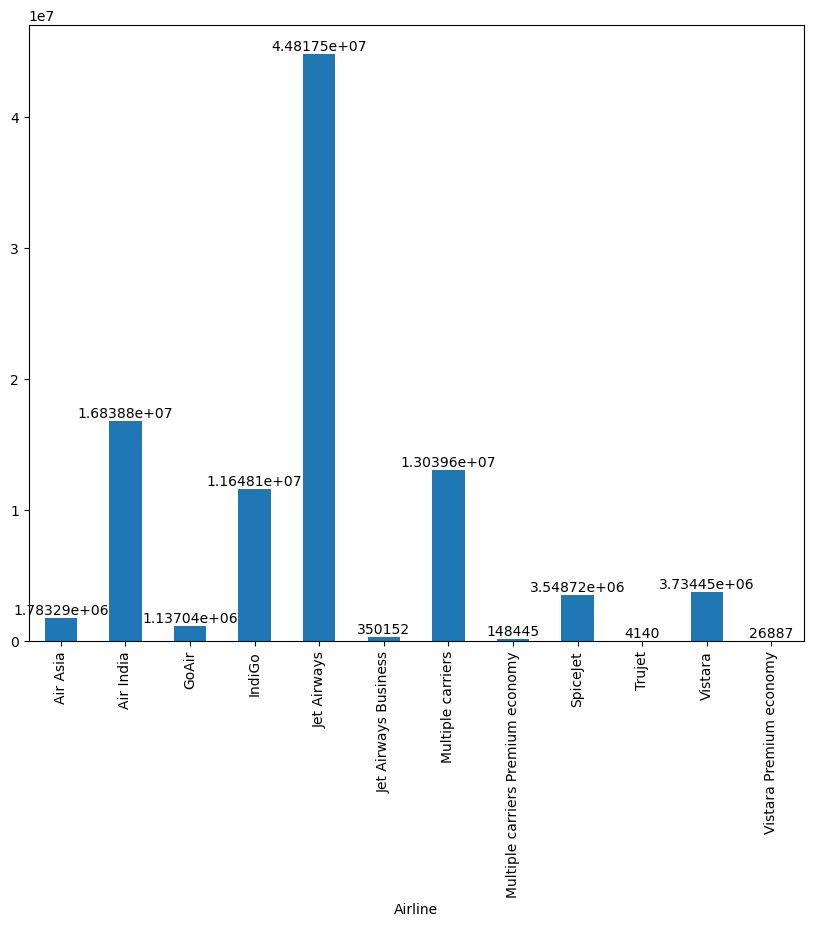

In [34]:
ax = train.Price.groupby(train.Airline).sum().plot(kind="bar",figsize=(10,8))
for i in ax.containers:
    ax.bar_label(i)

#### Jet Airways has the highest price

#### b) Check if the business class flights are high price or low and find only those flights which price is higher than 50k 

#### Business Class Flights are more Expensive

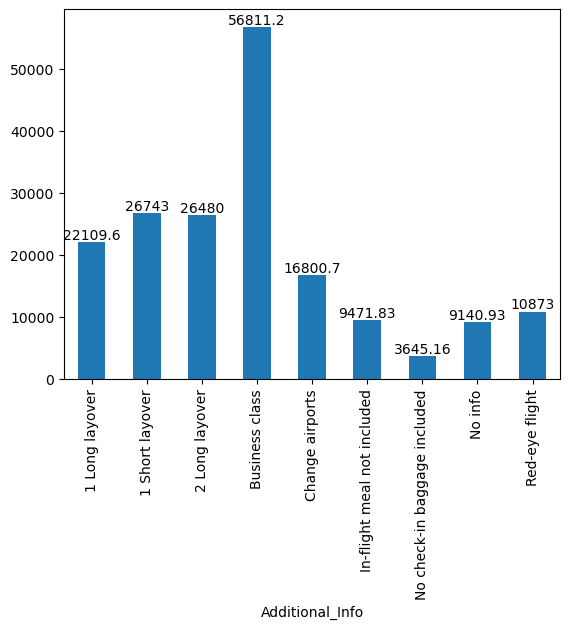

In [35]:
ax = train.Price.groupby(train.Additional_Info).mean().plot(kind="bar")
for i in ax.containers:
    ax.bar_label(i)

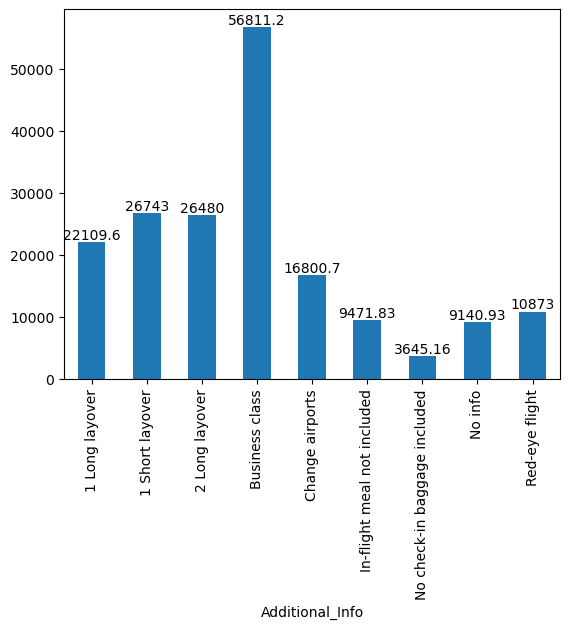

In [36]:
ax= train.Price.groupby(train.Additional_Info).mean().plot(kind="bar")
for i in ax.containers:
    ax.bar_label(i)

In [37]:
train.Additional_Info.value_counts()

Additional_Info
No info                         8348
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [38]:
# As you can see there is a very short distance between 2 Long layover, 1 Long layover and 2 Short layover 
# So we can combines these three categories in 1

In [39]:
train["Additional_Info"] = train.Additional_Info.map(lambda x : "layovers" if x== "1 Short layover" or x=="2 Long layover" 
                                                     or x=="1 Long layover" else x)

In [40]:
train.Additional_Info.value_counts()

Additional_Info
No info                         8348
In-flight meal not included     1982
No check-in baggage included     320
layovers                          21
Change airports                    7
Business class                     4
Red-eye flight                     1
Name: count, dtype: int64

## Perform encoding for the required features according to the data

In [41]:
train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_Year,journey_Month,journey_Day
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,3,1


#### My Dep_Time column is object Data type to convert this into float 

In [42]:
import datetime

In [43]:
train['Dep_Time'] = pd.to_datetime(train['Dep_Time'], format='%H:%M')

In [44]:
# Define a function to convert time to a numeric value

def time_to_numeric(time_str):
    time_obj = datetime.datetime.strptime(time_str, '%H:%M')
    numeric_value = time_obj.hour + time_obj.minute / 60.0
    return numeric_value

# Apply the function to the entire column
train['Dep_Time'] = train['Dep_Time'].apply(lambda x: time_to_numeric(x.strftime('%H:%M')))

In [45]:
train["Dep_Time"] = train.Dep_Time.round(2)

#### Same Process with the Arrival Time

In [46]:
import re

In [47]:
# Define a function to extract and convert hours and minutes to float
def extract_and_convert_to_float(time_str):
    # Use regular expression to find the pattern of hours and minutes
    pattern = r'(\d{1,2}):(\d{1,2})'
    match = re.search(pattern, time_str)
    if match:
        hours = int(match.group(1))
        minutes = int(match.group(2))
        return hours + minutes / 60.0
    else:
        return None

# Apply the function to the entire column and store the result in a new column
train['Arrival_Time'] = train['Arrival_Time'].apply(extract_and_convert_to_float)

In [48]:
train["Arrival_Time"] = train.Arrival_Time.round(2)

In [49]:
train.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_Year,journey_Month,journey_Day
0,IndiGo,Banglore,New Delhi,BLR → DEL,22.33,1.17,2h 50m,non-stop,No info,3897,2019,3,24


#### Convert Duration into Minutes

In [50]:
# Define a function to convert time strings to total minutes
def convert_to_minutes(time_str):
    parts = time_str.split()
    total_minutes = 0
    for part in parts:
        if 'h' in part:
            total_minutes += int(part.replace('h', '')) * 60
        elif 'm' in part:
            total_minutes += int(part.replace('m', ''))
    return total_minutes

# Apply the function to the entire column and store the result in a new column
train['Duration_in_minutes'] = train['Duration'].apply(convert_to_minutes)



In [51]:
train.drop("Duration",axis=1,inplace=True)

In [52]:
train.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,journey_Year,journey_Month,journey_Day,Duration_in_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22.33,1.17,non-stop,No info,3897,2019,3,24,170


### Using Ordinal Encoder instead of get_dummies or OneHot because data is less

In [53]:
from sklearn.preprocessing import OrdinalEncoder

In [54]:
train.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Total_Stops', 'Additional_Info', 'Price', 'journey_Year',
       'journey_Month', 'journey_Day', 'Duration_in_minutes'],
      dtype='object')

In [55]:
Columns = ['Airline', 'Source', 'Destination', 'Route','Total_Stops', 'Additional_Info']

In [56]:
Ord =OrdinalEncoder()

In [57]:
train[Columns] = Ord.fit_transform(train[Columns])

In [58]:
train[Columns] = train[Columns].astype(int)

In [59]:
train

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,journey_Year,journey_Month,journey_Day,Duration_in_minutes
0,3,0,5,18,22.33,1.17,3,4,3897,2019,3,24,170
1,1,3,0,84,5.83,13.25,1,4,7662,2019,5,1,445
2,4,2,1,118,9.42,4.42,1,4,13882,2019,6,9,1140
3,3,3,0,91,18.08,23.50,0,4,6218,2019,5,12,325
4,3,0,5,29,16.83,21.58,0,4,13302,2019,3,1,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,19.92,22.42,3,4,4107,2019,4,9,150
10679,1,3,0,64,20.75,23.33,3,4,4145,2019,4,27,155
10680,4,0,2,18,8.33,11.33,3,4,7229,2019,4,27,180
10681,10,0,5,18,11.50,14.17,3,4,12648,2019,3,1,160


# Data Splitting

In [60]:
X = train.drop("Price",axis=1)
y = train["Price"]

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.20)

In [63]:
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(8546, 12)
(2137, 12)
(8546,)
(2137,)


# Model Building

### Linear Regression

In [64]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [65]:
LR.fit(Xtrain,ytrain)

LinearRegression()

In [66]:
LR.score(Xtest,ytest)

0.39634775917647

### Decision Tree

In [67]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=8)
DT.fit(Xtrain,ytrain)

DecisionTreeRegressor(max_depth=8)

In [68]:
# Testing Score
DT.score(Xtest,ytest)

0.818162044078939

In [69]:
# Training Score
DT.score(Xtrain,ytrain)

0.8564666356417252

### Random Forest

In [70]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=1000,max_depth=8)

In [71]:
RF.fit(Xtrain,ytrain)

RandomForestRegressor(max_depth=8, n_estimators=1000)

In [72]:
RF.score(Xtest,ytest)

0.8280759546422272

### Ada Boost

In [73]:
from sklearn.ensemble import AdaBoostRegressor
ADA = AdaBoostRegressor(n_estimators=1000)

In [74]:
ADA.fit(Xtrain,ytrain)

AdaBoostRegressor(n_estimators=1000)

In [75]:
ADA.score(Xtest,ytest)

-0.10620171030827308

### Gradient Boosting

In [76]:
from sklearn.ensemble import GradientBoostingRegressor
GR = GradientBoostingRegressor(n_estimators=1000)

In [77]:
GR.fit(Xtrain,ytrain)

GradientBoostingRegressor(n_estimators=1000)

In [78]:
GR.score(Xtest,ytest)

0.8872894235763169

### XG Boost

In [79]:
from xgboost import XGBRegressor
XG = XGBRegressor(n_jobs=-1, n_estimators=1000,max_depth=7)

In [80]:
XG.fit(Xtrain,ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

In [81]:
XG.score(Xtest,ytest)

0.9061976980804963

##### i got 90% accuracy for XGboost

### Hyper Parameter Tunning

In [82]:
# Random Forest
dic = {
        "n_estimators":[1000,1500,2000],
        "max_depth" : [7,8,9],
        "max_features" : [13,10,9]
}

In [83]:
RF1 = RandomForestRegressor()

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
GSV = GridSearchCV(RF1,param_grid=dic,n_jobs=-1)

In [86]:
GSV.fit(Xtrain,ytrain)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [7, 8, 9], 'max_features': [13, 10, 9],
                         'n_estimators': [1000, 1500, 2000]})

In [87]:
GSV.best_score_

0.8355270751589245

In [88]:
GSV.best_params_

{'max_depth': 9, 'max_features': 9, 'n_estimators': 2000}

In [89]:
RF2 = RandomForestRegressor(n_estimators=1500, max_depth=9, max_features=9, n_jobs=-1)

In [90]:
RF2.fit(Xtrain,ytrain)

RandomForestRegressor(max_depth=9, max_features=9, n_estimators=1500, n_jobs=-1)

In [91]:
RF2.score(Xtest,ytest)

0.8543715720877072

# Evaluation Metrics

In [92]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

#### Linear Regression

In [93]:
ypred = LR.predict(Xtest)

In [96]:
print("MAE = ",mean_absolute_error(ytest,ypred))
print("RMSE = ",np.sqrt((mean_squared_error(ytest,ypred))))
print("MSE = ", mean_squared_error(ytest,ypred))
r2 = (r2_score(ytest,ypred))
print("R2 = ",r2) 
print("Adjusted R2 Score = ", 1-(((1-r2)*(len(train)-1))/(len(train)-14-1)))

MAE =  2549.3932566258177
RMSE =  3722.7853416328953
MSE =  13859130.699876752
R2 =  0.39634775917647
Adjusted R2 Score =  0.39555556463470687


#### Decision Tree

In [97]:
ypred = DT.predict(Xtest)

In [100]:
print("MAE = ",mean_absolute_error(ytest,ypred))
print("RMSE = ",np.sqrt((mean_squared_error(ytest,ypred))))
print("MSE = ", mean_squared_error(ytest,ypred))
r2 = (r2_score(ytest,ypred))
print("R2 = ",r2) 
print("Adjusted R2 Score = ", 1-(((1-r2)*(len(train)-1))/(len(train)-14-1)))

MAE =  1030.908280171515
RMSE =  1828.5113787662747
MSE =  3343453.862277743
R2 =  0.8543715720877072
Adjusted R2 Score =  0.8541804586652502


#### Random Forest

In [99]:
ypred = RF2.predict(Xtest)

In [101]:
print("MAE = ",mean_absolute_error(ytest,ypred))
print("RMSE = ",np.sqrt((mean_squared_error(ytest,ypred))))
print("MSE = ", mean_squared_error(ytest,ypred))
r2 = (r2_score(ytest,ypred))
print("R2 = ",r2) 
print("Adjusted R2 Score = ", 1-(((1-r2)*(len(train)-1))/(len(train)-14-1)))

MAE =  1030.908280171515
RMSE =  1828.5113787662747
MSE =  3343453.862277743
R2 =  0.8543715720877072
Adjusted R2 Score =  0.8541804586652502


#### Gradient Boosting

In [ ]:
ypred = GR.predict(Xtest)

In [102]:
print("MAE = ",mean_absolute_error(ytest,ypred))
print("RMSE = ",np.sqrt((mean_squared_error(ytest,ypred))))
print("MSE = ", mean_squared_error(ytest,ypred))
r2 = (r2_score(ytest,ypred))
print("R2 = ",r2) 
print("Adjusted R2 Score = ", 1-(((1-r2)*(len(train)-1))/(len(train)-14-1)))

MAE =  1030.908280171515
RMSE =  1828.5113787662747
MSE =  3343453.862277743
R2 =  0.8543715720877072
Adjusted R2 Score =  0.8541804586652502


#### XG Boost

In [ ]:
ypred = XG.predict(Xtest)

In [103]:
print("MAE = ",mean_absolute_error(ytest,ypred))
print("RMSE = ",np.sqrt((mean_squared_error(ytest,ypred))))
print("MSE = ", mean_squared_error(ytest,ypred))
r2 = (r2_score(ytest,ypred))
print("R2 = ",r2) 
print("Adjusted R2 Score = ", 1-(((1-r2)*(len(train)-1))/(len(train)-14-1)))

MAE =  1030.908280171515
RMSE =  1828.5113787662747
MSE =  3343453.862277743
R2 =  0.8543715720877072
Adjusted R2 Score =  0.8541804586652502


# Conclusion

So, we have used a many regressio models like [Linear, Decision tree, Random Forest, Ada Boost, Gradient Boost, XG Boost] for this data and improved accuracy by doing hyperparameter tuning. As a result, we were able to successfully train our regression models, In this dataset our XG Boost Regressor is a best model with the help of XG boost we achive R2 = 90%.

# Working On Test Data

## Same Prprocessing Steps as training data

In [104]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [105]:
# Here only one  record are available of 4 stops so i converted into 3 stops
test.Total_Stops = test.Total_Stops.replace("4 stops","3 stops")

In [106]:
test["Additional_Info"] = test.Additional_Info.replace("No Info","No info")

In [107]:
# But Lets fill them 
# Route is a caategorical Variable so we will use mode()
test["Route"] = test.Route.fillna(test.Route.mode()[0])
# Total Stops is also Categorical Variable - Mode()
test["Total_Stops"] = test.Total_Stops.fillna(test.Total_Stops.mode()[0])

In [108]:
# Convert each date string to datetime object
test["Date_of_Journey"] = [datetime.datetime.strptime(date_str, "%d/%m/%Y") for date_str in test.Date_of_Journey]

In [109]:
import datetime
test["Date_of_Journey"] = pd.to_datetime(test["Date_of_Journey"])

In [110]:
test["journey_Year"] = test["Date_of_Journey"].dt.year
test["journey_Month"] = test["Date_of_Journey"].dt.month
test["journey_Day"] = test["Date_of_Journey"].dt.day

In [111]:
# Drop - Date_of_journey
test.drop("Date_of_Journey",axis=1,inplace=True)

In [112]:
test["Additional_Info"] = test.Additional_Info.map(lambda x : "layovers" if x== "1 Short layover" or x=="2 Long layover" 
                                                     or x=="1 Long layover" else x)

In [113]:
test['Dep_Time'] = pd.to_datetime(test['Dep_Time'], format='%H:%M')
# Define a function to convert time to a numeric value

def time_to_numeric(time_str):
    time_obj = datetime.datetime.strptime(time_str, '%H:%M')
    numeric_value = time_obj.hour + time_obj.minute / 60.0
    return numeric_value

# Apply the function to the entire column
test['Dep_Time'] = test['Dep_Time'].apply(lambda x: time_to_numeric(x.strftime('%H:%M')))
test["Dep_Time"] = test.Dep_Time.round(2)

In [114]:
# Define a function to extract and convert hours and minutes to float
def extract_and_convert_to_float(time_str):
    # Use regular expression to find the pattern of hours and minutes
    pattern = r'(\d{1,2}):(\d{1,2})'
    match = re.search(pattern, time_str)
    if match:
        hours = int(match.group(1))
        minutes = int(match.group(2))
        return hours + minutes / 60.0
    else:
        return None

# Apply the function to the entire column and store the result in a new column
test['Arrival_Time'] = test['Arrival_Time'].apply(extract_and_convert_to_float)
test["Arrival_Time"] = test.Arrival_Time.round(2)

In [115]:
# Define a function to convert time strings to total minutes
def convert_to_minutes(time_str):
    parts = time_str.split()
    total_minutes = 0
    for part in parts:
        if 'h' in part:
            total_minutes += int(part.replace('h', '')) * 60
        elif 'm' in part:
            total_minutes += int(part.replace('m', ''))
    return total_minutes

# Apply the function to the entire column and store the result in a new column
test['Duration_in_minutes'] = test['Duration'].apply(convert_to_minutes)
test.drop("Duration",axis=1,inplace=True)


In [116]:
Columns = ['Airline', 'Source', 'Destination', 'Route','Total_Stops', 'Additional_Info']

In [117]:
Ord =OrdinalEncoder()
test[Columns] = Ord.fit_transform(test[Columns])
test[Columns] = test[Columns].astype(int)

#### This is a test data

In [118]:
test.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,journey_Year,journey_Month,journey_Day,Duration_in_minutes
0,4,2,1,76,17.50,4.42,0,4,2019,6,6,655
1,3,3,0,65,6.33,10.33,0,4,2019,5,12,240
2,4,2,1,76,19.25,19.00,0,2,2019,5,21,1425
3,6,2,1,76,8.00,21.00,0,4,2019,5,21,780
4,0,0,2,16,23.92,2.75,3,4,2019,6,24,170


#### This is a train data

In [119]:
train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,journey_Year,journey_Month,journey_Day,Duration_in_minutes
0,3,0,5,18,22.33,1.17,3,4,3897,2019,3,24,170
1,1,3,0,84,5.83,13.25,1,4,7662,2019,5,1,445
2,4,2,1,118,9.42,4.42,1,4,13882,2019,6,9,1140
3,3,3,0,91,18.08,23.50,0,4,6218,2019,5,12,325
4,3,0,5,29,16.83,21.58,0,4,13302,2019,3,1,285


In [120]:
xgtest = XG.predict(test)

In [121]:
pd.DataFrame(xgtest).to_csv("XG_Boost.csv")

In [122]:
rftest = RF.predict(test)

In [123]:
pd.DataFrame(rftest).to_csv("Random_Forest.csv")